# Question One

In [2]:
arr1 = [2, 3,5, 7]
arr2 = arr1
arr2[2] = 13
print(arr1[2]) # 13
arr3 = arr1[0:3]
arr3[0] = 17
print(arr1[0])

13
2


The assignment of arr1 to arr2 is basically adding reference to the object referred to by arr1 meaning they point to the same object in memory, so modification affects both of them
While arr3 is not affected because slicing creates a new object in memory thus modification is isolated to that object alone

In [3]:
def func(arr):
    arr.append(2) # this will internally affect the object not a copy

my_arr = [1, 2, 3]
print(len(my_arr))
func(my_arr)
print(len(my_arr))

3
4


In [5]:
dict1 = {"apples": 3, "oranges": 2}
dict2 = dict1
dict2['bananas'] = 5
if 'bananas' in dict1:
    print('there are bananas')
else:
    print('no bananas')
    
## this has the same explanation as 1 above

there are bananas


In [7]:
import numpy as np
a = np.random.rand(6, 3)*np.arange(3)
a

array([[0.        , 0.59752846, 1.37624287],
       [0.        , 0.12605888, 1.86657102],
       [0.        , 0.88880528, 1.79026571],
       [0.        , 0.05992492, 0.18034709],
       [0.        , 0.27635958, 0.80122549],
       [0.        , 0.56745646, 0.98889215]])

In [9]:
help('numpy.random.rand')

Help on built-in function rand in numpy.random:

numpy.random.rand = rand(...) method of mtrand.RandomState instance
    rand(d0, d1, ..., dn)
    
    Random values in a given shape.
    
    Create an array of the given shape and populate it with
    random samples from a uniform distribution
    over ``[0, 1)``.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, should all be positive.
        If no argument is given a single Python float is returned.
    
    Returns
    -------
    out : ndarray, shape ``(d0, d1, ..., dn)``
        Random values.
    
    See Also
    --------
    random
    
    Notes
    -----
    This is a convenience function. If you want an interface that
    takes a shape-tuple as the first argument, refer to
    np.random.random_sample .
    
    Examples
    --------
    >>> np.random.rand(3,2)
    array([[ 0.14022471,  0.96360618],  #random
           [ 0.37601032,  0.25528411],  #random
  

In [10]:
help('numpy.arange')

Help on built-in function arange in numpy:

numpy.arange = arange(...)
    arange([start,] stop[, step,], dtype=None)
    
    Return evenly spaced values within a given interval.
    
    Values are generated within the half-open interval ``[start, stop)``
    (in other words, the interval including `start` but excluding `stop`).
    For integer arguments the function is equivalent to the Python built-in
    `range` function, but returns an ndarray rather than a list.
    
    When using a non-integer step, such as 0.1, the results will often not
    be consistent.  It is better to use `numpy.linspace` for these cases.
    
    Parameters
    ----------
    start : number, optional
        Start of interval.  The interval includes this value.  The default
        start value is 0.
    stop : number
        End of interval.  The interval does not include this value, except
        in some cases where `step` is not an integer and floating point
        round-off affects the length of `o

It creates an array of arrays with each array containing 3 elements and there is 6 of them. 
The created array is multiplied with an array of 3 integers 0,1,2

In [11]:
class CartPoint:
    def __init__(self, tup):
        self.x, self.y, self.z = tup
    
    def magnitude(self):
        return (self.x**2 + self.y**2 + self.z**2)**0.5

class CartPointTime(CartPoint):
    def __init__(self, tup):
        self.x, self.y, self.z, self.t = tup
        
    def magnitude_and_time(self):
        return (self.magnitude(), self.t)

In [12]:
c = CartPointTime((2,3,4,6))
c.magnitude_and_time()

(5.385164807134504, 6)

In [25]:
def word_count(filename):
    # create a dictionary of word as key and count as value
    word_dict = {}
    f = open(filename, "r")
    file_content = f.readlines()
    for word in file_content:
        if word in word_dict:
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    
    sorted_tups = sorted(word_dict.items(), key=lambda kv: kv[1])
    return sorted_tups[len(sorted_tups)-1][0]    

In [26]:
word_count("test.txt")

'ab\n'

In [28]:
# x + 3y + 5z = 10
# 2x + 3y + 8z = 3
# 2x + 5y + z = 8

# build matrices of the equations
x = np.array([[1, 3, 5], [2,3,8], [2,5,1]])
y = np.array([10, 3, 8])

np.linalg.solve(x, y)

array([-9.28,  5.16,  0.76])

# Question Two

In [35]:
# make an array using the coeffients
eq = np.array([1, 3, 2, -1])
np.roots(eq)

array([-1.66235898+0.56227951j, -1.66235898-0.56227951j,
        0.32471796+0.j        ])

In [92]:
import sympy as sy
from sympy.solvers.ode import dsolve

t = sy.symbols("t", real=True)
f = sy.symbols("f", function=True)


eq1 = sy.Eq(f(t).diff(t), f(t)**4)  # the equation 
sls = dsolve(eq1)  # solvde ODE

# print solutions:
print("For ode")
display(eq1)
print("the solutions are:")
for s in sls:
    display(s)

# plot solutions:
x = np.linspace(0, 2, 100)
fg, axx = plt.subplots(2, 1)
axx[0].set_title("Real part of solution of $\\frac{d}{dt}f(t)= (f(t))^4$")
axx[1].set_title("Imag. part of solution of $\\frac{d}{dt}f(t)= (f(t))^4$")
fg.suptitle("$C_1=0.1$")
for i, s in enumerate(sls, start=1):
    fn1 = s.rhs.subs("C1", .1)  # C_1 -> 1
    fn2 = sy.lambdify(t, fn1, modules="numpy")  # make numpy function
    y = fn2(x+0j)  # needs to be called with complex number
    axx[0].plot(x, np.real(y), label="Sol. %d" % i)
    axx[1].plot(x, np.imag(y), label="Sol. %d" % i)
for ax in axx:
    ax.legend(loc="best")
    ax.grid(True)
axx[0].set_ylabel("Re$\\{f(t)\\}$")
axx[1].set_ylabel("Im$\\{f(t)\\}$")
axx[-1].set_xlabel("$t$")
fg.canvas.draw()
plt.show()

TypeError: 'Symbol' object is not callable

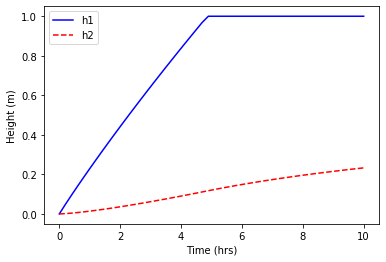

In [93]:
from scipy.integrate import odeint

def tank(h,t):
   # constants
   c1 = 0.13
   c2 = 0.20
   Ac = 2      # m^2
   # inflow
   qin = 0.5   # m^3/hr
   # outflow
   qout1 = c1 * h[0]**0.5
   qout2 = c2 * h[1]**0.5
   # differential equations
   dhdt1 = (qin   - qout1) / Ac
   dhdt2 = (qout1 - qout2) / Ac
   # overflow conditions
   if h[0]>=1 and dhdt1>=0:
       dhdt1 = 0
   if h[1]>=1 and dhdt2>=0:
       dhdt2 = 0
   dhdt = [dhdt1,dhdt2]
   return dhdt

# integrate the equations
t = np.linspace(0,10) # times to report solution
h0 = [0,0]            # initial conditions for height
y = odeint(tank,h0,t) # integrate

# plot results
plt.figure(1)
plt.plot(t,y[:,0],'b-')
plt.plot(t,y[:,1],'r--')
plt.xlabel('Time (hrs)')
plt.ylabel('Height (m)')
plt.legend(['h1','h2'])
plt.show()

# Question Three

In [36]:
def fib(n):
    if n == 0 or n==1:
        return 1
    return fib(n-1) + fib(n-2)

In [75]:
fib(4)

5

In [39]:
class Rectangle:
    def __init__(self, x, y, height, width):
        self.x = x
        self.y = y
        self.height = height
        self.width = width

box = Rectangle(100, 100, 50, 30)

In [46]:
# suppose the values
x, y, z = 5, 8, 15

# 3x + y
3*x + y

23

In [47]:
# 3x
3*x

15

In [48]:
# x is evenly divisible by 12
x % 12 == 0

False

In [49]:
# x plus 7 is more than 100 or less than 50
x + 7 > 100 or x + 7 < 50

True

In [50]:
# x<=y and 2 <=z
x <= y and 2 <= z

True

In [68]:
# 1st way to integrate
def custom_integrate(f, a, b, N):
    x = np.linspace(a+(b-a)/(2*N), b-(b-a)/(2*N), N)
    fx = f(x)
    area = np.sum(fx)*(b-a)/N
    return area

def square(x):
    return x**2

custom_integrate(square, 0, 2, 100)

2.6666000000000003

In [70]:
# using scipy
import scipy.integrate as integrate
# using a lambda function to pass in the required expression
integrate.quad(lambda x: x**2, 0, 2)

(2.666666666666667, 2.960594732333751e-14)

# Question Four

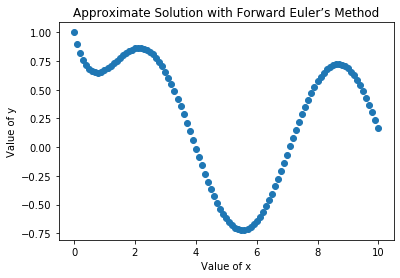

In [84]:
import numpy as np 
from matplotlib import pyplot as plt

x0 = 0
y0 = 1
xf = 10
n = 101
deltax = (xf - x0)/(n-1)
x = np.linspace(x0, xf, n)
y = np.zeros([n])
y[0] = y0
for i in range(1, n):
    y[i] = deltax*(-y[i-1] + np.sin(x[i-1])) + y[i-1]

plt.plot(x, y, 'o')
plt.xlabel("Value of x")
plt.ylabel("Value of y")
plt.title("Approximate Solution with Forward Euler’s Method")
plt.show()


In [87]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt


# Concentration over time
N = lambda t: N0 * np.exp(-k * t)
# dN/dt
def dx_dt(x):
    return -k * x

k = .5
h = 0.001
N0 = 100.

t = np.arange(0, 10, h)
y = np.zeros(len(t))

y[0] = N0
for i in range(1, len(t)):
    # Euler's method
    y[i] = y[i-1] + dx_dt(y[i-1]) * h

max_error = abs(y-N(t)).max()
print("Max difference between the exact solution and Euler's approximation with step size h=0.001:")

print('{0:.15}'.format(max_error))

Max difference between the exact solution and Euler's approximation with step size h=0.001:
0.00919890254720457


In [88]:
def Euler(f, t0, tf, y0, n):
    h = (tf -t0)/n

    t = []
    y = []

    t.append(t0)
    y.append(y0)

    for i in range(n+1):
        tx = t[i]+h
        t.append(tx)

        y1 = y[i]+(h*(f(t[i], y[i])))
        y.append(y1)

    for j in range(n+1):
        print("%0.1f %f"%(t[j], y[j]))

    pyplot.plot(t, y, 0)
    pyplot.xlabel("Value of t")
    pyplot.ylabel("Value of y")
    pyplot.title("Approximate Solutions of IVPs using Euler's Method")
    pyplot.show()

    return

In [89]:
def gauss(A):
    m = len(A)
    assert all([len(row) == m + 1 for row in A[1:]]), "Matrix rows have non-uniform length"
    n = m + 1
    
    for k in range(m):
        pivots = [abs(A[i][k]) for i in range(k, m)]
        i_max = pivots.index(max(pivots)) + k
        
        # Check for singular matrix
        assert A[i_max][k] != 0, "Matrix is singular!"
        
        # Swap rows
        A[k], A[i_max] = A[i_max], A[k]

        
        for i in range(k + 1, m):
            f = A[i][k] / A[k][k]
            for j in range(k + 1, n):
                A[i][j] -= A[k][j] * f

            # Fill lower triangular matrix with zeros:
            A[i][k] = 0
    
    # Solve equation Ax=b for an upper triangular matrix A         
    x = []
    for i in range(m - 1, -1, -1):
        x.insert(0, A[i][m] / A[i][i])
        for k in range(i - 1, -1, -1):
            A[k][m] -= A[k][i] * x[0]
    return x